# Задача. Кластеризация клиентов банка

## Формирование датасета

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# Задаем путь к файлу с данными
path_to_data = "D:/Работа/Python/Tasks/Sberbank2/Задание 2. Python Кластеризация/"

In [3]:
#Считываем данные из файла
list_name = ['age',
                'gender',
                'city_type',
                'full_mob',
                'ml_balance',
                'cl_balance_0m',
                'loan_balance_0m',
                'td_balance_0m',
                'casa_balance_0m',
                'dc_trx_cnt',
                'dc_trx_sum',
                'income',
                'min_casa_balance_1q',
                'avg_casa_balance_1Y',
                'Avg_trx',
                'nbi']
list_name_ = ['возраст_группа',
             'пол',
             'город',
             'срок_сотрудничества',
             'ипотека',
             'потреб_кредит',
              'все_кредиты',
              'депозит',
              'счета',
              'кол-во_трат_карты',
              'сумма_трат_карты',
              'доход_клиента',
              'счет_кв',
              'счет_год',
              'средняя_транзак',
              'доход_без_OPEX',
              'кластер'
             ]
dict_dtype= {'age':np.int64,
                'gender':str,
                'city_type':str,
                'full_mob':np.float64,
                'ml_balance':np.float64,
                'cl_balance_0m':np.float64,
                'loan_balance_0m':np.float64,
                'td_balance_0m':np.float64,
                'casa_balance_0m':np.float64,
                'dc_trx_cnt':np.float64,
                'dc_trx_sum':np.float64,
                'income':np.float64,
                'min_casa_balance_1q':np.float64,
                'avg_casa_balance_1Y':np.float64,
                'Avg_trx':np.float64,
                'nbi':np.float64}

df = pd.read_csv(os.path.join(path_to_data, "test_cluster.csv"),
                 sep=";",
                 usecols  = list_name, 
                 dtype= dict_dtype,
                 encoding='Windows-1251')

In [4]:
df.head(10)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
0,71,NaN,<100,103.0,0.0,0.0,0.00,0.0,0.000000e+00,0.0,0.00,0.0,0.000000e+00,0.000000e+00,NaN,NaN
1,49,NaN,Mega,81.0,0.0,0.0,0.00,0.0,3.272937e+03,0.0,0.00,0.0,3.272937e+03,4.716127e+03,NaN,28.762952
2,56,NaN,Mega,81.0,0.0,0.0,0.00,0.0,6.249755e+03,6.0,5128.02,0.0,6.249755e+03,1.023960e+04,854.670000,1973.335539
3,47,NaN,Mega,81.0,0.0,0.0,0.00,0.0,1.435494e+04,0.0,0.00,0.0,1.435494e+04,1.390584e+04,NaN,364.008556
4,74,NaN,Mega,81.0,0.0,0.0,0.00,0.0,9.151177e+04,0.0,0.00,0.0,9.151177e+04,9.608961e+04,NaN,6651.416562
5,72,М,Mega,50.0,0.0,0.0,0.00,0.0,9.369080e+04,0.0,0.00,0.0,9.369080e+04,9.313178e+04,NaN,2433.644326
6,46,NaN,<100,81.0,0.0,0.0,0.00,0.0,5.350795e+03,0.0,0.00,0.0,5.350795e+03,6.704830e+03,NaN,177.408546
7,62,NaN,<100,56.0,0.0,0.0,0.00,0.0,4.783591e+04,0.0,0.00,0.0,4.783591e+04,4.881469e+04,NaN,1284.357885
8,39,NaN,100-500,13.0,0.0,0.0,0.00,0.0,2.919013e+06,0.0,0.00,0.0,2.919013e+06,2.887886e+06,NaN,17397.286761
9,36,М,<100,154.0,0.0,0.0,32413.52,0.0,0.000000e+00,83.0,324947.73,22100.0,0.000000e+00,8.931475e+02,3915.032892,6065.052515


In [5]:
# Смотрим базовую информацию по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  float64
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  float64
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  avg_casa_balance_1Y  50000 non-null  float64
 14  Avg_trx              32128 non-null  float64
 15  nbi                  47569 non-null 

In [6]:
# Удаляем из датафрейма строки, где не указан пол
df.dropna(subset=['gender'], inplace=True)

In [7]:
df.head(10)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
5,72,М,Mega,50.0,0.0,0.00,0.00,0.0,93690.801,0.0,0.00,0.00,93690.801,93131.782817,NaN,2433.644326
9,36,М,<100,154.0,0.0,0.00,32413.52,0.0,0.000,83.0,324947.73,22100.00,0.000,893.147500,3915.032892,6065.052515
10,56,F,<100,165.0,0.0,0.00,61189.99,70000.0,1524.580,341.0,451481.51,36694.37,1470.560,5844.510000,1323.992698,8009.940315
11,19,М,100-500,40.0,0.0,0.00,0.00,0.0,19.650,72.0,15529.58,1293.60,1.050,217.270833,215.688611,684.233442
12,20,F,1M+,3.0,0.0,0.00,0.00,0.0,10338.170,105.0,126229.83,44169.00,4699.570,19043.322500,1202.188857,157.694118
13,51,М,100-500,37.0,0.0,0.00,0.00,0.0,8738.120,189.0,783517.26,62108.23,8738.120,31656.927500,4145.593968,3054.122311
14,50,F,100-500,156.0,0.0,0.00,521337.41,0.0,50.020,16.0,243600.00,385000.00,0.000,374.842500,15225.000000,57309.483796
15,32,М,100-500,13.0,0.0,0.00,0.00,0.0,22765.080,0.0,0.00,0.00,22765.080,22765.080000,NaN,2058.408650
16,28,М,<100,63.0,0.0,179900.88,179900.88,0.0,12933.520,0.0,0.00,0.00,6344.450,8001.347500,NaN,21894.257314
17,21,F,<100,52.0,0.0,0.00,0.00,0.0,1142.060,0.0,0.00,0.00,1142.060,1142.060000,NaN,103.264569


In [8]:
# Заменяем NaN на 0 в числовых столбцах
df.fillna(0, inplace=True)

In [9]:
df.head(10)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
5,72,М,Mega,50.0,0.0,0.00,0.00,0.0,93690.801,0.0,0.00,0.00,93690.801,93131.782817,0.000000,2433.644326
9,36,М,<100,154.0,0.0,0.00,32413.52,0.0,0.000,83.0,324947.73,22100.00,0.000,893.147500,3915.032892,6065.052515
10,56,F,<100,165.0,0.0,0.00,61189.99,70000.0,1524.580,341.0,451481.51,36694.37,1470.560,5844.510000,1323.992698,8009.940315
11,19,М,100-500,40.0,0.0,0.00,0.00,0.0,19.650,72.0,15529.58,1293.60,1.050,217.270833,215.688611,684.233442
12,20,F,1M+,3.0,0.0,0.00,0.00,0.0,10338.170,105.0,126229.83,44169.00,4699.570,19043.322500,1202.188857,157.694118
13,51,М,100-500,37.0,0.0,0.00,0.00,0.0,8738.120,189.0,783517.26,62108.23,8738.120,31656.927500,4145.593968,3054.122311
14,50,F,100-500,156.0,0.0,0.00,521337.41,0.0,50.020,16.0,243600.00,385000.00,0.000,374.842500,15225.000000,57309.483796
15,32,М,100-500,13.0,0.0,0.00,0.00,0.0,22765.080,0.0,0.00,0.00,22765.080,22765.080000,0.000000,2058.408650
16,28,М,<100,63.0,0.0,179900.88,179900.88,0.0,12933.520,0.0,0.00,0.00,6344.450,8001.347500,0.000000,21894.257314
17,21,F,<100,52.0,0.0,0.00,0.00,0.0,1142.060,0.0,0.00,0.00,1142.060,1142.060000,0.000000,103.264569


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49277 entries, 5 to 49999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49277 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            49277 non-null  object 
 3   full_mob             49277 non-null  float64
 4   ml_balance           49277 non-null  float64
 5   cl_balance_0m        49277 non-null  float64
 6   loan_balance_0m      49277 non-null  float64
 7   td_balance_0m        49277 non-null  float64
 8   casa_balance_0m      49277 non-null  float64
 9   dc_trx_cnt           49277 non-null  float64
 10  dc_trx_sum           49277 non-null  float64
 11  income               49277 non-null  float64
 12  min_casa_balance_1q  49277 non-null  float64
 13  avg_casa_balance_1Y  49277 non-null  float64
 14  Avg_trx              49277 non-null  float64
 15  nbi                  49277 non-null 

In [11]:
# Изменяем тип числовых полей на целочисленный
for name_col in df:
    if df[name_col].dtype==np.float64:
        df[name_col] = df[name_col].astype(np.int64)

In [12]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
5,72,М,Mega,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433
9,36,М,<100,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065
10,56,F,<100,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009
11,19,М,100-500,40,0,0,0,0,19,72,15529,1293,1,217,215,684
12,20,F,1M+,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49277 entries, 5 to 49999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  49277 non-null  int64 
 1   gender               49277 non-null  object
 2   city_type            49277 non-null  object
 3   full_mob             49277 non-null  int64 
 4   ml_balance           49277 non-null  int64 
 5   cl_balance_0m        49277 non-null  int64 
 6   loan_balance_0m      49277 non-null  int64 
 7   td_balance_0m        49277 non-null  int64 
 8   casa_balance_0m      49277 non-null  int64 
 9   dc_trx_cnt           49277 non-null  int64 
 10  dc_trx_sum           49277 non-null  int64 
 11  income               49277 non-null  int64 
 12  min_casa_balance_1q  49277 non-null  int64 
 13  avg_casa_balance_1Y  49277 non-null  int64 
 14  Avg_trx              49277 non-null  int64 
 15  nbi                  49277 non-null  int64 
dtypes: i

In [14]:
# Исключаем из выборки неактивных клиентов
df['valid'] = df.iloc[:,3:].sum(axis=1)
df = df.loc[df['valid'] != 0]
df.drop(['valid'], axis='columns', inplace=True)

In [15]:
# Контролируем количество отсеченных строк
df.shape

(49210, 16)

In [16]:
# Разбиваем всех клиентов на возрастные группы
def age_group(x:int)-> str:
    if 0 <= x <= 17: return "0-17"
    if 18 <= x <= 25: return "18-25"
    if 26 <= x <= 35: return "26-35"
    if 36 <= x <= 45: return "36-45"
    if 46 <= x <= 55: return "46-55"
    if 56 <= x <= 65: return "56-65"
    if 66 <= x <= 75: return "56-75"
    if 76 <= x: return ">76"
            
df['age_group'] = df['age'].apply(lambda x: age_group(x))

In [17]:
# Проверяем численность возрастных групп
df['age_group'].value_counts()

26-35    13365
36-45    13212
46-55     9883
56-65     6415
18-25     4226
56-75     1371
0-17       370
>76        368
Name: age_group, dtype: int64

In [18]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi,age_group
5,72,М,Mega,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433,56-75
9,36,М,<100,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065,36-45
10,56,F,<100,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009,56-65
11,19,М,100-500,40,0,0,0,0,19,72,15529,1293,1,217,215,684,18-25
12,20,F,1M+,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157,18-25


In [19]:
# Удаление ненужного столбца и изменение порядка следования полей
df.drop(['age'], axis='columns', inplace=True)

In [20]:
new_order = ['age_group',
'gender',
 'city_type',
 'full_mob',
 'ml_balance',
 'cl_balance_0m',
 'loan_balance_0m',
 'td_balance_0m',
 'casa_balance_0m',
 'dc_trx_cnt',
 'dc_trx_sum',
 'income',
 'min_casa_balance_1q',
 'avg_casa_balance_1Y',
 'Avg_trx',
 'nbi']
df=df.reindex(columns=new_order)


In [21]:
df.head()

,age_group,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
5,56-75,М,Mega,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433
9,36-45,М,<100,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065
10,56-65,F,<100,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009
11,18-25,М,100-500,40,0,0,0,0,19,72,15529,1293,1,217,215,684
12,18-25,F,1M+,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157


In [22]:
# Удаляем кириллические символы в столбце gender
def gender_filter(x:str)-> str:
    if x=="М":
        return'M'
    else:
        return x
df['gender'] = df['gender'].apply(lambda x: gender_filter(x))

## Подготовка данных для применения алгоритмов машинного обучения

In [23]:
dict_age_group = { "0-17":1, "18-25":2, "26-35":3, "36-45":4, "46-55":5,"56-65":6, "56-75":7,">76":8}

In [24]:
dict_gender = {'M':1, 'F':0}

In [25]:
dict_city_type={'<100':1,'100-500':2,'Mega':5,'1M+':4,'500-1000':3}

In [26]:
# Переводим строковые константы в числовой вид
df['age_group_ml'] = df['age_group'].map(dict_age_group)
df['gender_ml'] = df['gender'].map(dict_gender)
df['city_type_ml'] = df['city_type'].map(dict_city_type)

In [27]:
df.head()

,age_group,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi,age_group_ml,gender_ml,city_type_ml
5,56-75,M,Mega,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433,7,1,5
9,36-45,M,<100,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065,4,1,1
10,56-65,F,<100,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009,6,0,1
11,18-25,M,100-500,40,0,0,0,0,19,72,15529,1293,1,217,215,684,2,1,2
12,18-25,F,1M+,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157,2,0,4


In [28]:
df_ml = df.drop(['age_group','gender','city_type'], axis='columns')

In [29]:
df_ml.head()

,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi,age_group_ml,gender_ml,city_type_ml
5,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433,7,1,5
9,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065,4,1,1
10,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009,6,0,1
11,40,0,0,0,0,19,72,15529,1293,1,217,215,684,2,1,2
12,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157,2,0,4


In [30]:
df_final = df.drop(['age_group_ml','gender_ml','city_type_ml'], axis='columns')

In [31]:
df_final.head()

,age_group,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
5,56-75,M,Mega,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433
9,36-45,M,<100,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065
10,56-65,F,<100,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009
11,18-25,M,100-500,40,0,0,0,0,19,72,15529,1293,1,217,215,684
12,18-25,F,1M+,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157


In [32]:
# Нормализуем значения
scaler = MinMaxScaler()
names = df_ml.columns
data_train = scaler.fit_transform(df_ml) 
df_train= pd.DataFrame(data_train, columns=names)
df_train.head()

,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi,age_group_ml,gender_ml,city_type_ml
0,0.211864,0.0,0.0,0.000000,0.000000,3.786260e-04,0.000000,0.000000,0.000000,3.786260e-04,3.001128e-04,0.000000,0.000519,0.857143,1.0,1.00
1,0.652542,0.0,0.0,0.002209,0.000000,0.000000e+00,0.027946,0.008942,0.000244,0.000000e+00,2.877675e-06,0.002238,0.001293,0.428571,1.0,0.00
2,0.699153,0.0,0.0,0.004169,0.000212,6.158885e-06,0.114815,0.012423,0.000405,5.940657e-06,1.883217e-05,0.000756,0.001707,0.714286,0.0,0.00
3,0.169492,0.0,0.0,0.000000,0.000000,7.678400e-08,0.024242,0.000427,0.000014,4.041263e-09,6.992782e-07,0.000123,0.000146,0.142857,1.0,0.25
4,0.012712,0.0,0.0,0.000000,0.000000,4.177858e-05,0.035354,0.003473,0.000488,1.898990e-05,6.136569e-05,0.000687,0.000033,0.142857,0.0,0.75


## Определение оптимального количества кластеров

Text(0, 0.5, 'Сумма квадратов расстояний от точек до центроидов')

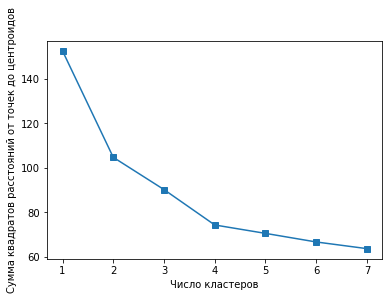

In [33]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний от точек до центроидов')

In [34]:
# Видим, что  падает сильно при увеличении числа кластеров с 1 до 4 и уже не так сильно – при изменении  с 4 до 7. 
# Значит, в данной задаче оптимально задать 4 кластера.

## Алгоритм машинного обучения kMeans

In [35]:
# Описываем модель
model = KMeans(n_clusters=4)

# Проводим моделирование
model.fit(df_train)

# Предсказание на всем наборе данных
all_predictions = model.predict(df_train)

print(all_predictions)


[3 1 2 ... 3 1 2]


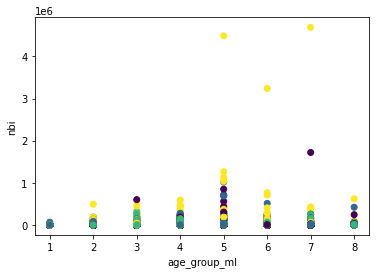

In [36]:
# Построим график. Возрастные группы - доходы от клиентов
plt.xlabel(df_ml['age_group_ml'].name)
plt.ylabel(df_ml['nbi'].name)
plt.scatter(df_ml['age_group_ml'], df_ml['nbi'], c=all_predictions)
plt.show()


## Формирование итогового датасета и его выгрузка

In [37]:
df_final = df_final.assign(cluster=all_predictions)
df_final.columns = list_name_

In [38]:
df_final.head()

,возраст_группа,пол,город,срок_сотрудничества,ипотека,потреб_кредит,все_кредиты,депозит,счета,кол-во_трат_карты,сумма_трат_карты,доход_клиента,счет_кв,счет_год,средняя_транзак,доход_без_OPEX,кластер
5,56-75,M,Mega,50,0,0,0,0,93690,0,0,0,93690,93131,0,2433,3
9,36-45,M,<100,154,0,0,32413,0,0,83,324947,22100,0,893,3915,6065,1
10,56-65,F,<100,165,0,0,61189,70000,1524,341,451481,36694,1470,5844,1323,8009,2
11,18-25,M,100-500,40,0,0,0,0,19,72,15529,1293,1,217,215,684,1
12,18-25,F,1M+,3,0,0,0,0,10338,105,126229,44169,4699,19043,1202,157,0


In [39]:
df_final.to_csv (os.path.join(path_to_data, "test_cluster_final.csv"), index=False, encoding = 'utf-8')